# Check the Autoencoder


    keras == 2.4.3
    tf == 2.3.1

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
sys.path.insert(1, '../src/')

from image_tools import *
import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


## Get Data

In [2]:
data_path = "../../ndsc_data/"
path_image = '../../ndsc_data/training_img/training_img/'

In [3]:
d_train = pd.read_csv(os.path.join(data_path, "new_training_set.csv"),
                      usecols=["title_1", "image_1", "title_2", "image_2", "Label"])
d_test = pd.read_csv(os.path.join(data_path, "new_test_sample.csv"))

In [4]:
d_train.shape

(10181, 5)

In [5]:
d_train.head()

,title_1,image_1,title_2,image_2,Label
0,Johnson’s ® Top to Toe Hair & Body Bath 500ml,fdff8b9b8229da091dd7d070aae05f81.jpg,Johnson's cottontouch top to toe hair & body b...,41e191742760932598c7bd201e5dad47.jpg,0
1,Sandal Humble,906cc44f0be72d4e767669b5b63e3a17.jpg,Sandal Humble Glass - Glanzton,7a556b836bfdd08ea592216440524a34.jpg,0
2,PROMO LIKUID LIKUIT LIQUIT BABY POD LIQUID SAL...,475c26635de18b9f93032400732ff336.jpg,Voporizer Liquit - Likuit - Likuid - Liquid Pr...,ace93bec689f3f1565800c500a8341fa.jpg,0
3,6 Pasang / Set Anting Tusuk Bentuk Lingkaran A...,e630997f6217555d6026547ad1c15f0b.jpg,Subei 6 Pasang / Set Anting Tusuk Boho Bohemia...,31abbc176b09f5bd1728cfc3ecbbfb9c.jpg,0
4,ROREC NATURAL SKIN CARE MASK ROREC SHEET MASK ...,a27d11700a7902febd039dc3a96f10f2.jpg,Rorec 86 Natural Skin Care Shert Mask All Variant,813ad9dd638c10f1765db9dde20c9e42.jpg,1


## Get the images

In [6]:
len(os.listdir(path_image))

10414

In [7]:
xtrain = []
for im in os.listdir(path_image):
    X0 = cv2.imread(path_image+im)
    X0_res = cv2.resize(X0, (44,44))
    xtrain.append(X0_res)

In [8]:
xtrain = np.array(xtrain)

In [9]:
xtrain.shape

(10414, 44, 44, 3)

In [10]:
xtrain = xtrain.astype('float32') / 255.

In [11]:
X1, X2 = train_test_split(xtrain, test_size=0.25,random_state = 234)

In [12]:
X1.shape

(7810, 44, 44, 3)

In [13]:
X2.shape

(2604, 44, 44, 3)

## Model

In [22]:
mod = auto_encoderv1()

In [23]:
mod.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 44, 44, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 8)         2312      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
enc (MaxPooling2D)           (None, 6, 6, 8)          

## Train it

In [35]:
filepath = '../../ndsc_model/autoencoder_v1/model_{epoch:02d}_{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)

In [41]:
# opt = keras.optimizers.Adam(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.001)
mod.compile(optimizer=opt, loss='binary_crossentropy')

In [42]:
enc_train = mod.fit(X1, X1,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X2, X2),
                   callbacks=[checkpoint])

Epoch 1/50
61/62 [============================>.] - ETA: 0s - loss: 0.4296
Epoch 00001: val_loss did not improve from 0.42910
62/62 [==============================] - 31s 506ms/step - loss: 0.4295 - val_loss: 0.4348
Epoch 2/50
61/62 [============================>.] - ETA: 0s - loss: 0.4269
Epoch 00002: val_loss did not improve from 0.42910
62/62 [==============================] - 23s 375ms/step - loss: 0.4269 - val_loss: 0.4348
Epoch 3/50
61/62 [============================>.] - ETA: 0s - loss: 0.4267
Epoch 00003: val_loss did not improve from 0.42910
62/62 [==============================] - 27s 434ms/step - loss: 0.4268 - val_loss: 0.4342
Epoch 4/50
61/62 [============================>.] - ETA: 0s - loss: 0.4265
Epoch 00004: val_loss did not improve from 0.42910
62/62 [==============================] - 27s 439ms/step - loss: 0.4265 - val_loss: 0.4341
Epoch 5/50
61/62 [============================>.] - ETA: 0s - loss: 0.4264
Epoch 00005: val_loss did not improve from 0.42910
62/62 [===

## Check

In [44]:
mod_enc = load_model('../../ndsc_model/autoencoder_v1/model_42_0.4291.hdf5') 

In [53]:
Xc = X2[4:10]

In [54]:
XcT = mod_enc.predict(Xc)

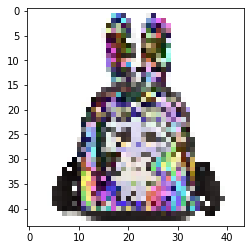

In [61]:
plt.imshow(Xc[0])

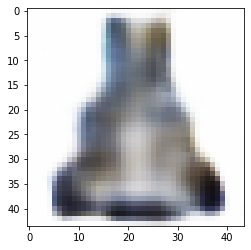

In [62]:
plt.imshow(XcT[0])